#DATA MINING AND NEURAL NETWORKS    
##Assignment 2.2.2 - Automatic Relevance Determination

In this file, we conduct Automatic Relevance Determination (ARD) on one synthetic dataset and one real-world dataset.

The implementation of ARD is based on the ``python`` package ``scikit-learn``.


In [ ]:
# Please first load your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Please go to the folder with all assignment files
# Please change the following path to your own path
!cd /content/drive/MyDrive/DMNN/DMNN2023

/bin/bash: line 1: cd: /content/drive/MyDrive/DMNN/DMNN2023: No such file or directory


## Synthetic dataset
In this section, we conduct ARD regression on a synthetic dataset with ``python`` package ``scikit-learn``.
We compare the weights learned by ARD and ordinary least squares (OLS) estimator, and disucss the results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import ARDRegression, LinearRegression

In [ ]:
# Generating simulated data with Gaussian weights
# Parameters of the example
np.random.seed(0)
n_samples, n_features = 100, 100
# Create Gaussian data
X = np.random.randn(n_samples, n_features)
# Create weights with a precision lambda_ of 4.
lambda_ = 4.0
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
print("Relevant feature dimensions are {}".format(relevant_features))


for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.0
noise = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

Relevant feature dimensions are [12 16 20 33 75 28 89 19 92 42]


In [ ]:
print(y)

[ 2.0359356  -0.32901409 -0.91208816 -0.15826822 -2.3201454  -1.86835984
  0.80164288  3.25844205  1.30148214  1.85759     0.98393823  0.11491273
 -1.3231378   1.32478341 -0.24082011 -1.81416254 -1.45545145  0.75303457
  1.04066667 -0.61466007 -0.41901623 -1.50097327 -1.63152275  0.0771357
 -0.77730189  0.83132651  2.257284    0.1050196   0.74787061 -0.92573765
  1.15640606 -0.70713505 -1.0703189  -0.4113537  -0.91167451  1.80262206
  0.62180625  1.86719746  1.47875767  0.50707196  0.85154623  0.50330961
  0.98067159 -0.17724249 -0.83897351  0.05007354 -0.44004069  0.96757832
 -0.22355194 -0.59429272 -0.44358851  1.08257487 -0.783681   -1.10513002
 -1.54288687  2.75580299  1.06448362  0.09583693  0.33060606  0.57509831
  1.70503478 -1.07082687  0.78319838  0.53064366  1.30757924  0.73839967
  1.35353933 -0.09965324 -0.45582895  1.41550902 -0.77350684 -1.26494524
  1.91116422 -0.74833135 -0.85829919 -0.65894188 -1.06177847 -1.15423087
  0.35229285 -0.59389084  0.06780503 -0.77314532  1.

We now implement ARDRegression and OLS on the dataset.

In [ ]:
# Fit the ARD Regression
clf = ARDRegression(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

Now, we plot the true weights, the estimated weights by ARD and OLS.
Compared to OLS, the coefficient weights of ARD are shifted toward zeros, hence bring sparseness, which also makes the regressor more stable.

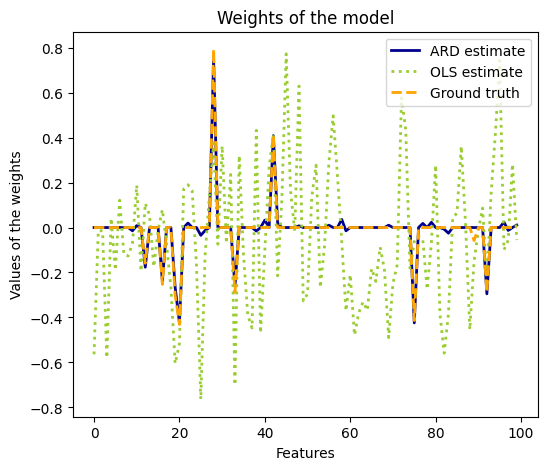

In [ ]:
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color="darkblue", linestyle="-", linewidth=2, label="ARD estimate")
plt.plot(
    ols.coef_, color="yellowgreen", linestyle=":", linewidth=2, label="OLS estimate"
)
plt.plot(w, color="orange", linestyle="--", linewidth=2, label="Ground truth")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc=1)

We also plot the histogram of the estimated weights. It can be seen that the histogram is very peaked. This is due to the sparsity-inducing prior implied on the weights used in ARD.

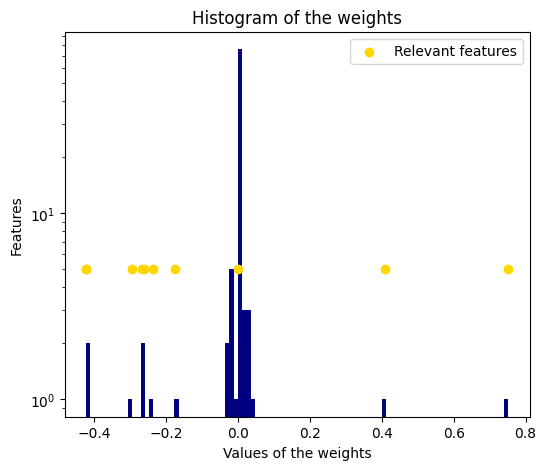

In [ ]:
plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color="navy", log=True)
plt.scatter(
    clf.coef_[relevant_features],
    np.full(len(relevant_features), 5.0),
    color="gold",
    marker="o",
    label="Relevant features",
)
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc=1)

## Real-world dataset: Diabetes dataset
In this section, we apply ARD to the real-world dataset. We first need to install the ``openml`` package for loading the dataset.
Although we consider a classification dataset, ARD regression can still be applied to it since classification can be regarded as a regression task with ``[0,1]`` as regression targets.

In [ ]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.7 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.1-py3-none-any.whl size=146923 sha256=96d704a42cdca1d3979af005c7911afedd679c4baa290309c2f3ecab13ec5f56
  Stored in directory: /root/.cache/pip/wheels/75/bc/fd/739778254a2881ef96b139d0aaf60c6d4f9130bb1459b48f10
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=afa4b5d01890e4ce3ee2fd23acce151a3ff0d91e69aa0d9da653f164540bca81
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [ ]:
import numpy as np
import openml
import math

from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, confusion_matrix

# Load the dataset
dataset = openml.datasets.get_dataset(42608)
# Turn data into numpy array
X, _, _, _ = dataset.get_data(dataset_format="array")
# Check the data size and dimension
print(X.shape)
# Separate input and targets
y = X[:,-1]
X = X[:,:-1]

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-9-8e83b77fea45>:10: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, _, _, _ = dataset.get_data(dataset_format="array")


(768, 9)


In [ ]:
# Fit the ARD Regression
clf = ARDRegression(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

The weights of ARD show how the corresponding dimensions contribute to the prediction results.
It can be seen that the ``[0, 5, 6]`` dimensions are of importance.

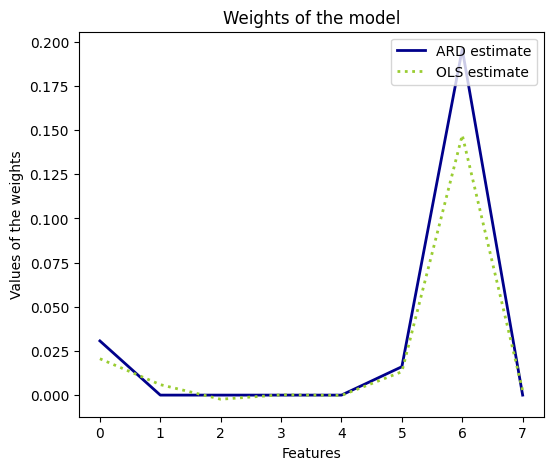

In [ ]:
# Plot the true weights, the estimated weights, the histogram of the
# weights, and predictions with standard deviations
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color="darkblue", linestyle="-", linewidth=2, label="ARD estimate")
plt.plot(
    ols.coef_, color="yellowgreen", linestyle=":", linewidth=2, label="OLS estimate"
)
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc=1)

To verify if ARD shows the importance of each dimension, we conduct the following experiments where we compare the prediction results using the complete dataset and reduced dataset using only the ``[0,5,6]``-th dimensions.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Partition dataset into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

X_train_reduce = X_train[:,[0,5,6]]
y_train_reduce = y_train
X_test_reduce = X_test[:,[0,5,6]]
y_test_reduce = y_test

In [ ]:
# Build the MLP
# You can build multiple layers simpley by adding number of neurons in each layer in hidden_layer_sizes
clf = MLPClassifier(hidden_layer_sizes=(20,50,), activation='relu', max_iter=5000)

# Train the MLP on the training set
clf.fit(X_train, y_train)

# Evaluatte the MLP on the validation set
y_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

print("Acc on the test set is {:.3f}".format(acc_test))

Acc on the test set is 0.617


In [ ]:
# Build the MLP
# You can build multiple layers simpley by adding number of neurons in each layer in hidden_layer_sizes
clf = MLPClassifier(hidden_layer_sizes=(20,50,), activation='relu', max_iter=5000)

# Train the MLP on the training set
clf.fit(X_train_reduce, y_train_reduce)

# Evaluatte the MLP on the validation set
y_pred_reduce = clf.predict(X_test_reduce)
acc_test_reduce = accuracy_score(y_test_reduce, y_pred_reduce)

print("Acc on the dimension reduced test set is {:.3f}".format(acc_test_reduce))

Acc on the dimension reduced test set is 0.708
